In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense,Activation,Dropout
from sklearn import metrics
import tensorflow as tf

In [2]:
customer_df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
customer_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
customer_df = customer_df.drop(columns=['customerID'])

In [4]:
customer_df['TotalCharges'] = pd.to_numeric(customer_df['TotalCharges'], downcast='float', errors='coerce')

In [5]:
customer_df = customer_df.dropna()
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [6]:
tenure_churn = customer_df[customer_df['Churn'] == 'Yes'].tenure
tenure_no_churn = customer_df[customer_df['Churn'] == 'No'].tenure

MonthlyCharges_churn = customer_df[customer_df['Churn'] == 'Yes'].MonthlyCharges
MonthlyCharges_no_churn = customer_df[customer_df['Churn'] == 'No'].MonthlyCharges

TotalCharges_churn = customer_df[customer_df['Churn'] == 'Yes'].TotalCharges
TotalCharges_no_churn = customer_df[customer_df['Churn'] == 'No'].TotalCharges

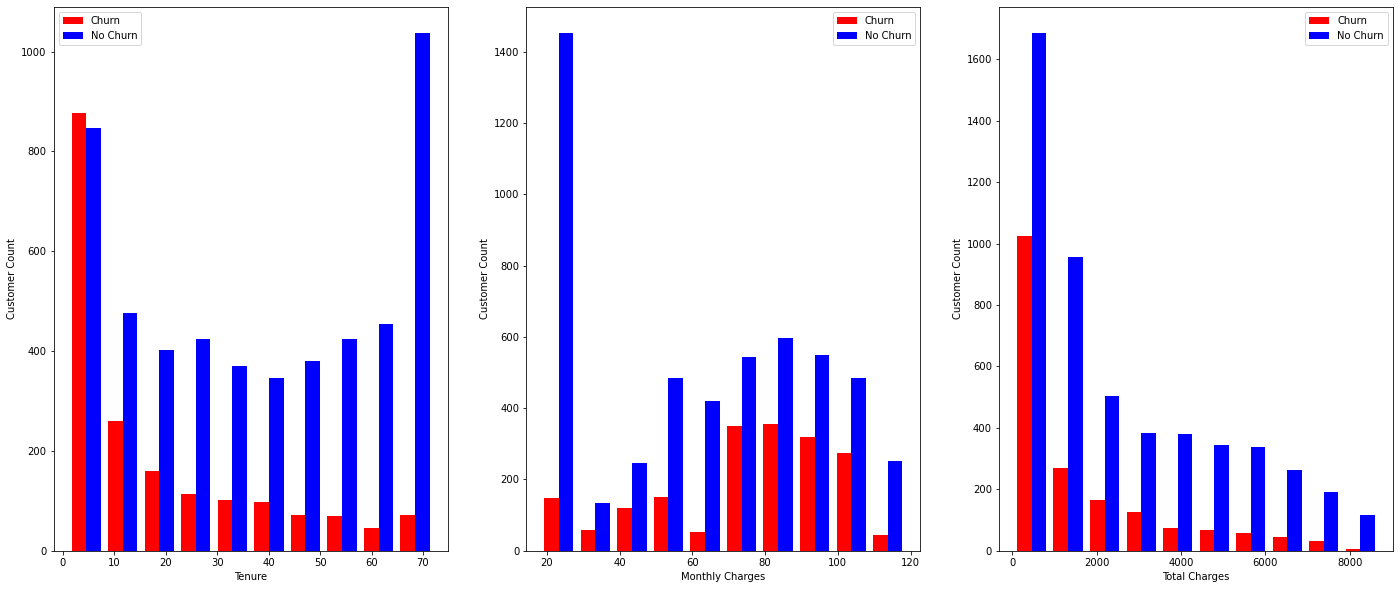

In [7]:
plt.figure(figsize=(24,10))

plt.subplot(1, 3, 1)
plt.hist([tenure_churn, tenure_no_churn], label=['Churn', 'No Churn'], color=['red', 'blue'])
plt.xlabel('Tenure')
plt.ylabel('Customer Count')
plt.legend()

plt.subplot(1, 3, 2)
plt.hist([MonthlyCharges_churn, MonthlyCharges_no_churn], label=['Churn', 'No Churn'], color=['red', 'blue'])
plt.xlabel('Monthly Charges')
plt.ylabel('Customer Count')
plt.legend()

plt.subplot(1, 3, 3)
plt.hist([TotalCharges_churn, TotalCharges_no_churn], label=['Churn', 'No Churn'], color=['red', 'blue'])
plt.xlabel('Total Charges')
plt.ylabel('Customer Count')
plt.legend()

plt.show()

In [8]:
customer_df = customer_df.replace('Male', 1)
customer_df = customer_df.replace('Female', 0)
customer_df = customer_df.replace('Yes', 1)
customer_df = customer_df.replace('No', 0)
customer_df = customer_df.replace('No phone service', 0)
customer_df = customer_df.replace('No internet service', 0)

In [9]:
customer_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.850000,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.500000,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.150002,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.750000,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.649994,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.500000,0
7039,0,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.899902,0
7040,0,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.450012,0
7041,1,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.600006,1


In [10]:
customer_df['OnlineSecurity'] = pd.to_numeric(customer_df['OnlineSecurity'], downcast='integer')
customer_df['OnlineBackup'] = pd.to_numeric(customer_df['OnlineBackup'], downcast='integer')
customer_df['DeviceProtection'] = pd.to_numeric(customer_df['DeviceProtection'], downcast='integer')
customer_df['TechSupport'] = pd.to_numeric(customer_df['TechSupport'], downcast='integer')
customer_df['StreamingTV'] = pd.to_numeric(customer_df['StreamingTV'], downcast='integer')
customer_df['StreamingMovies'] = pd.to_numeric(customer_df['StreamingMovies'], downcast='integer')
customer_df['PaperlessBilling'] = pd.to_numeric(customer_df['PaperlessBilling'], downcast='integer')
customer_df['Churn'] = pd.to_numeric(customer_df['Churn'], downcast='integer')

In [11]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   int8   
 9   OnlineBackup      7032 non-null   int8   
 10  DeviceProtection  7032 non-null   int8   
 11  TechSupport       7032 non-null   int8   
 12  StreamingTV       7032 non-null   int8   
 13  StreamingMovies   7032 non-null   int8   
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   int8   
 16  PaymentMethod     7032 non-null   object 


In [12]:
customer_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.850000,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.500000,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.150002,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.750000,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.649994,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.500000,0
7039,0,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.899902,0
7040,0,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.450012,0
7041,1,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.600006,1


In [13]:
scaler = MinMaxScaler()

In [14]:
customer_df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(customer_df[['tenure', 'MonthlyCharges', 'TotalCharges']])

In [15]:
customer_df = pd.get_dummies(customer_df, columns=['InternetService', 'Contract', 'PaymentMethod'])

In [16]:
x = customer_df.drop(columns=['Churn'])
y = customer_df['Churn']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [18]:
model = Sequential()
model.add(Dense(32, input_shape=(26,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [19]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
model_history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
137/176 [======================>.......] - ETA: 0s - loss: 0.6173 - accuracy: 0.6835WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x00000222DBDF6168> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10

In [21]:
model.evaluate(x_test, y_test)

44/44 [==============================] - 0s 488us/step - loss: 0.4415 - accuracy: 0.7832


[0.44149214029312134, 0.783226728439331]

In [22]:
predictions = model.predict(x_test)

predictions_binary = []
for pred in predictions:
    if pred >= 0.6:
        predictions_binary.append(1)
    else:
        predictions_binary.append(0)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [23]:
print(metrics.confusion_matrix(y_test, predictions_binary))
print(metrics.classification_report(y_test, predictions_binary))
print(metrics.accuracy_score(y_test, predictions_binary))

[[979  54]
 [241 133]]
              precision    recall  f1-score   support

           0       0.80      0.95      0.87      1033
           1       0.71      0.36      0.47       374

    accuracy                           0.79      1407
   macro avg       0.76      0.65      0.67      1407
weighted avg       0.78      0.79      0.76      1407

0.7903340440653873


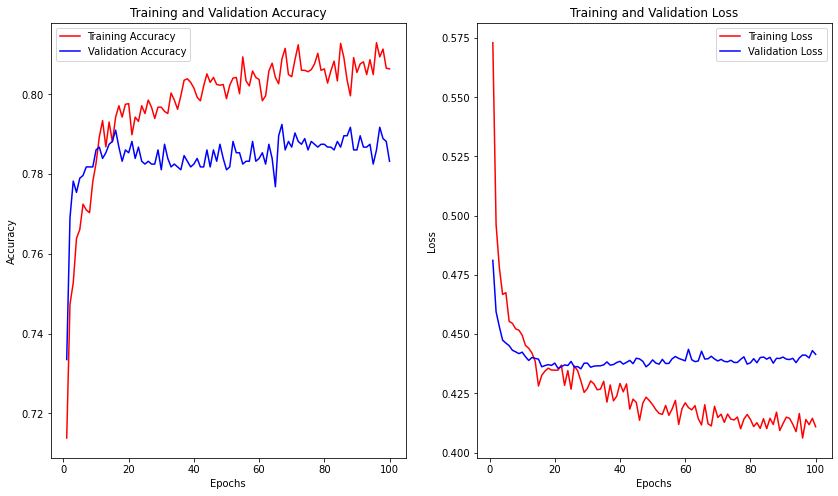

In [24]:
acc_train=model_history.history['accuracy']
acc_val=model_history.history['val_accuracy']
loss_train=model_history.history['loss']
loss_val=model_history.history['val_loss']
epochs=range(1,101)

plt.figure(figsize=(14,8))
plt.subplot(1, 2, 1)
plt.plot(epochs,acc_train,'r',label='Training Accuracy')
plt.plot(epochs,acc_val,'b',label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs,loss_train,'r',label='Training Loss')
plt.plot(epochs,loss_val,'b',label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()